In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import glob

especies = "/content/drive/MyDrive/Scripts/Data base/Species/StateSpec.csv"

caminho = "/content/drive/MyDrive/Scripts/Data base/Location Statistics/*.csv"

df = pd.read_csv(especies)

result = df.dropna()

result['estado'] = result['estado'].str.upper()

resultado_especies = result.groupby('estado')['scientificName'].apply(list).reset_index()

arquivos = glob.glob(caminho)
df_list = [pd.read_csv(arquivo) for arquivo in arquivos]

df_concatenado = pd.concat(df_list, ignore_index=True)

df_concatenado['risco_fogo'] = df_concatenado['risco_fogo'].clip(lower=0)
df_concatenado['numero_dias_sem_chuva'] = df_concatenado['numero_dias_sem_chuva'].clip(lower=0)

resultado = df_concatenado.groupby('estado').agg({
    'risco_fogo': 'mean',
    'numero_dias_sem_chuva': 'mean'
}).reset_index()

resultado['risco_fogo'] = resultado['risco_fogo'] * 100

resultado_sorted = resultado.sort_values(
    by=['risco_fogo', 'numero_dias_sem_chuva'],
    ascending=[False, False]
)

resultado_final = pd.merge(resultado_sorted, resultado_especies, on='estado', how='left')

resultado_limpo = resultado_final.dropna()

analise = resultado_limpo.rename(columns={
    'estado': 'Estado',
    'risco_fogo': 'Risco de fogo',
    'numero_dias_sem_chuva': 'Dias sem chuva',
    'scientificName': 'Nome das espécies'
})

analise

<ipython-input-32-78371e307457>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['estado'] = result['estado'].str.upper()


,Estado,Risco de fogo,Dias sem chuva,Nome das espécies
3,MATO GROSSO,89.128879,61.852073,"[Electron platyrhynchum, Stephanopoides brasil..."
4,MINAS GERAIS,88.927214,63.004937,"[Myiarchus swainsoni, Elachistocleis cesarii, ..."
6,MARANHÃO,85.083030,39.282260,"[Crocosmia, Eryphanis automedon, Fistulinella ..."
7,ALAGOAS,84.961559,7.339149,"[Geothlypis, Certhiaxis cinnamomeus, Machetorn..."
8,RIO DE JANEIRO,84.661765,12.234218,"[Sicalis flaveola, Zonotrichia capensis, Droso..."
9,BAHIA,84.410354,40.049673,"[Ocyptamus obliquus, Cardiidae, Melocactus vio..."
11,GOIÁS,82.260524,61.714327,"[Thalurania furcata, Turdus rufiventris, Eacle..."
12,PARÁ,82.007322,27.731121,"[Patagioenas cayennensis, Thraupidae, Anartia ..."
15,ESPÍRITO SANTO,78.757791,17.946138,"[Brownea grandiceps, Tayassu pecari, Amapamiri..."
19,PARAÍBA,70.065830,9.256384,"[Tityus pusillus, Alouatta belzebul, Iridopelm..."


In [18]:
import pandas as pd
import glob

especies = "/content/drive/MyDrive/Scripts/Data base/Species/StateSpec.csv"
caminho = "/content/drive/MyDrive/Scripts/Data base/Location Statistics/*.csv"

df = pd.read_csv(especies)
result = df.dropna().copy()
result.loc[:, 'estado'] = result['estado'].str.upper()
resultado_especies = result.groupby('estado')['scientificName'].apply(list).reset_index()

arquivos = glob.glob(caminho)
df_list = [pd.read_csv(arquivo) for arquivo in arquivos]
df_concatenado = pd.concat(df_list, ignore_index=True)

df_concatenado['risco_fogo'] = df_concatenado['risco_fogo'].clip(lower=0)
df_concatenado['numero_dias_sem_chuva'] = df_concatenado['numero_dias_sem_chuva'].clip(lower=0)

if 'data' in df_concatenado.columns:
    df_concatenado['data'] = pd.to_datetime(df_concatenado['data'])
    df_concatenado['ano'] = df_concatenado['data'].dt.year

    resultado_historico = df_concatenado.groupby(['estado', 'ano']).agg({
        'risco_fogo': 'mean',
        'numero_dias_sem_chuva': 'mean'
    }).reset_index()
else:
    resultado_historico = df_concatenado.groupby('estado').agg({
        'risco_fogo': 'mean',
        'numero_dias_sem_chuva': 'mean'
    }).reset_index()

resultado_historico['risco_fogo'] = resultado_historico['risco_fogo'] * 100

resultado_historico = pd.merge(resultado_historico, resultado_especies, on='estado', how='left')

resultado_historico = resultado_historico.rename(columns={
    'estado': 'Estado',
    'ano': 'Ano',
    'risco_fogo': 'Risco de Fogo (%)',
    'numero_dias_sem_chuva': 'Dias sem Chuva'
})

resultado_historico

analise = resultado_historico

# analise = analise.drop(columns=['scientificName'])

analise = analise.sort_values(
    by=['Risco de Fogo (%)', 'Dias sem Chuva'],
    ascending=[False, False]
)

analise = analise.rename(columns={
    'Estado': 'Estado',
    'Risco de Fogo (%)': 'Risco de fogo',
    'Dias sem Chuva': 'Dias sem chuva'
})

analise


,Estado,Risco de fogo,Dias sem chuva,scientificName
26,TOCANTINS,93.265850,62.608624,NaN
17,PIAUÍ,91.420779,50.423687,NaN
25,SÃO PAULO,89.326373,27.285488,NaN
10,MATO GROSSO,89.128879,61.852073,"[Electron platyrhynchum, Stephanopoides brasil..."
12,MINAS GERAIS,88.927214,63.004937,"[Myiarchus swainsoni, Elachistocleis cesarii, ..."
24,SERGIPE,86.292778,11.098400,NaN
9,MARANHÃO,85.083030,39.282260,"[Crocosmia, Eryphanis automedon, Fistulinella ..."
1,ALAGOAS,84.961559,7.339149,"[Geothlypis, Certhiaxis cinnamomeus, Machetorn..."
18,RIO DE JANEIRO,84.661765,12.234218,"[Sicalis flaveola, Zonotrichia capensis, Droso..."
4,BAHIA,84.410354,40.049673,"[Ocyptamus obliquus, Cardiidae, Melocactus vio..."


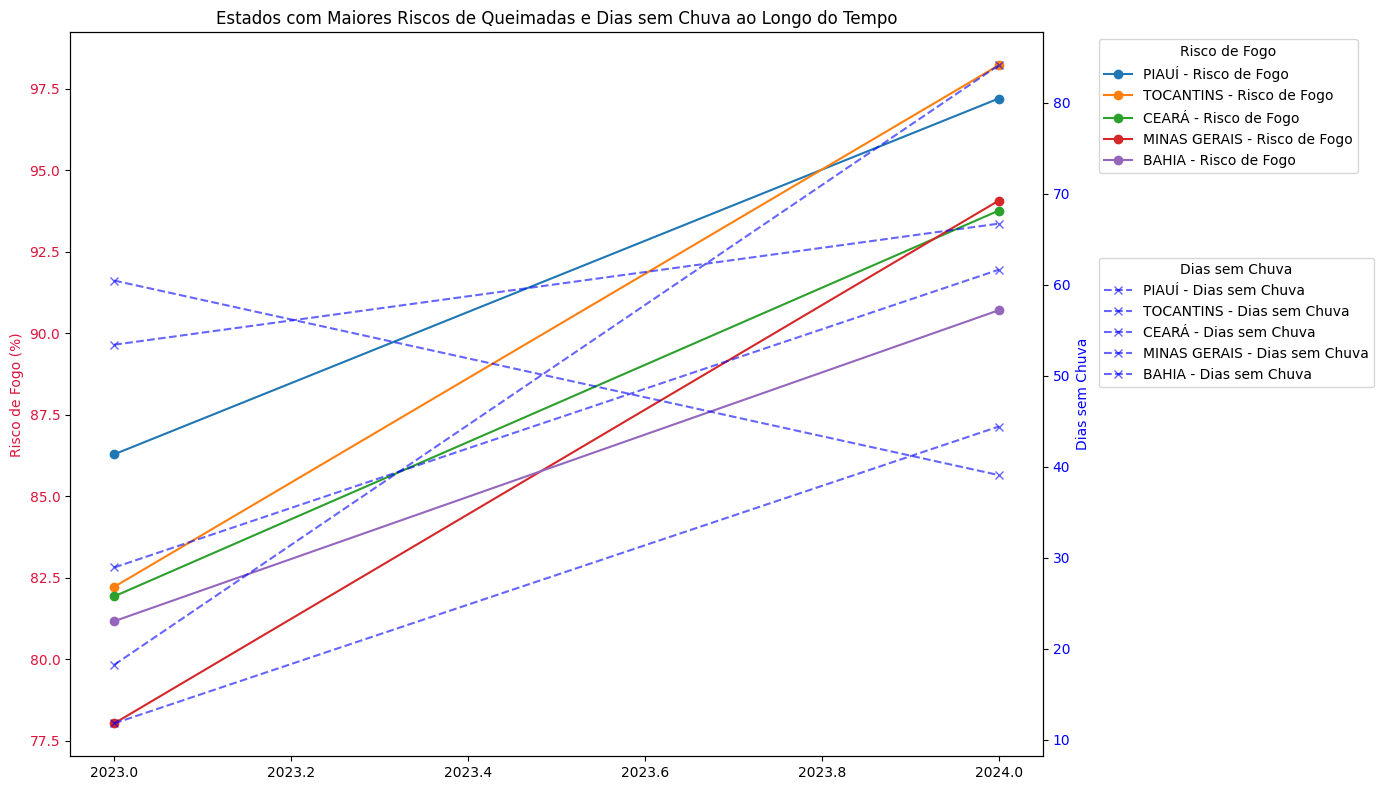

In [ ]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import re

especies = "/content/drive/MyDrive/Scripts/Data base/Species/StateSpec.csv"
caminho = "/content/drive/MyDrive/Scripts/Data base/Location Statistics/*.csv"

df = pd.read_csv(especies)
df['estado'] = df['estado'].str.upper()
resultado_especies = df.groupby('estado')['scientificName'].apply(list).reset_index()
arquivos = glob.glob(caminho)
df_list = []

for arquivo in arquivos:
    ano = re.search(r'\d{4}', arquivo)
    if ano:
        ano = int(ano.group(0))

        temp_df = pd.read_csv(arquivo)
        temp_df['ano'] = ano
        df_list.append(temp_df)

df_concatenado = pd.concat(df_list, ignore_index=True)

df_concatenado['risco_fogo'] = df_concatenado['risco_fogo'].clip(lower=0)
df_concatenado['numero_dias_sem_chuva'] = df_concatenado['numero_dias_sem_chuva'].clip(lower=0)

resultado_temporal = df_concatenado.groupby(['estado', 'ano']).agg({
    'risco_fogo': 'mean',
    'numero_dias_sem_chuva': 'mean'
}).reset_index()

resultado_temporal['risco_fogo'] = resultado_temporal['risco_fogo'] * 100

estados_criticos = resultado_temporal.groupby('estado')['risco_fogo'].mean().nlargest(5).index
resultado_filtrado = resultado_temporal[resultado_temporal['estado'].isin(estados_criticos)]

fig, ax1 = plt.subplots(figsize=(14, 8))

for estado in estados_criticos:
    estado_data = resultado_filtrado[resultado_filtrado['estado'] == estado]
    ax1.plot(estado_data['ano'], estado_data['risco_fogo'], marker='o', label=f'{estado} - Risco de Fogo', linestyle='-')

ax1.set_ylabel('Risco de Fogo (%)', color='crimson')
ax1.tick_params(axis='y', labelcolor='crimson')

ax2 = ax1.twinx()
for estado in estados_criticos:
    estado_data = resultado_filtrado[resultado_filtrado['estado'] == estado]
    ax2.plot(estado_data['ano'], estado_data['numero_dias_sem_chuva'], marker='x', linestyle='--', color='blue', alpha=0.6, label=f'{estado} - Dias sem Chuva')

ax2.set_ylabel('Dias sem Chuva', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Estados com Maiores Riscos de Queimadas e Dias sem Chuva ao Longo do Tempo')
ax1.legend(loc="upper left", bbox_to_anchor=(1.05, 1), title="Risco de Fogo")
ax2.legend(loc="lower left", bbox_to_anchor=(1.05, 0.5), title="Dias sem Chuva")
fig.tight_layout()
plt.show()


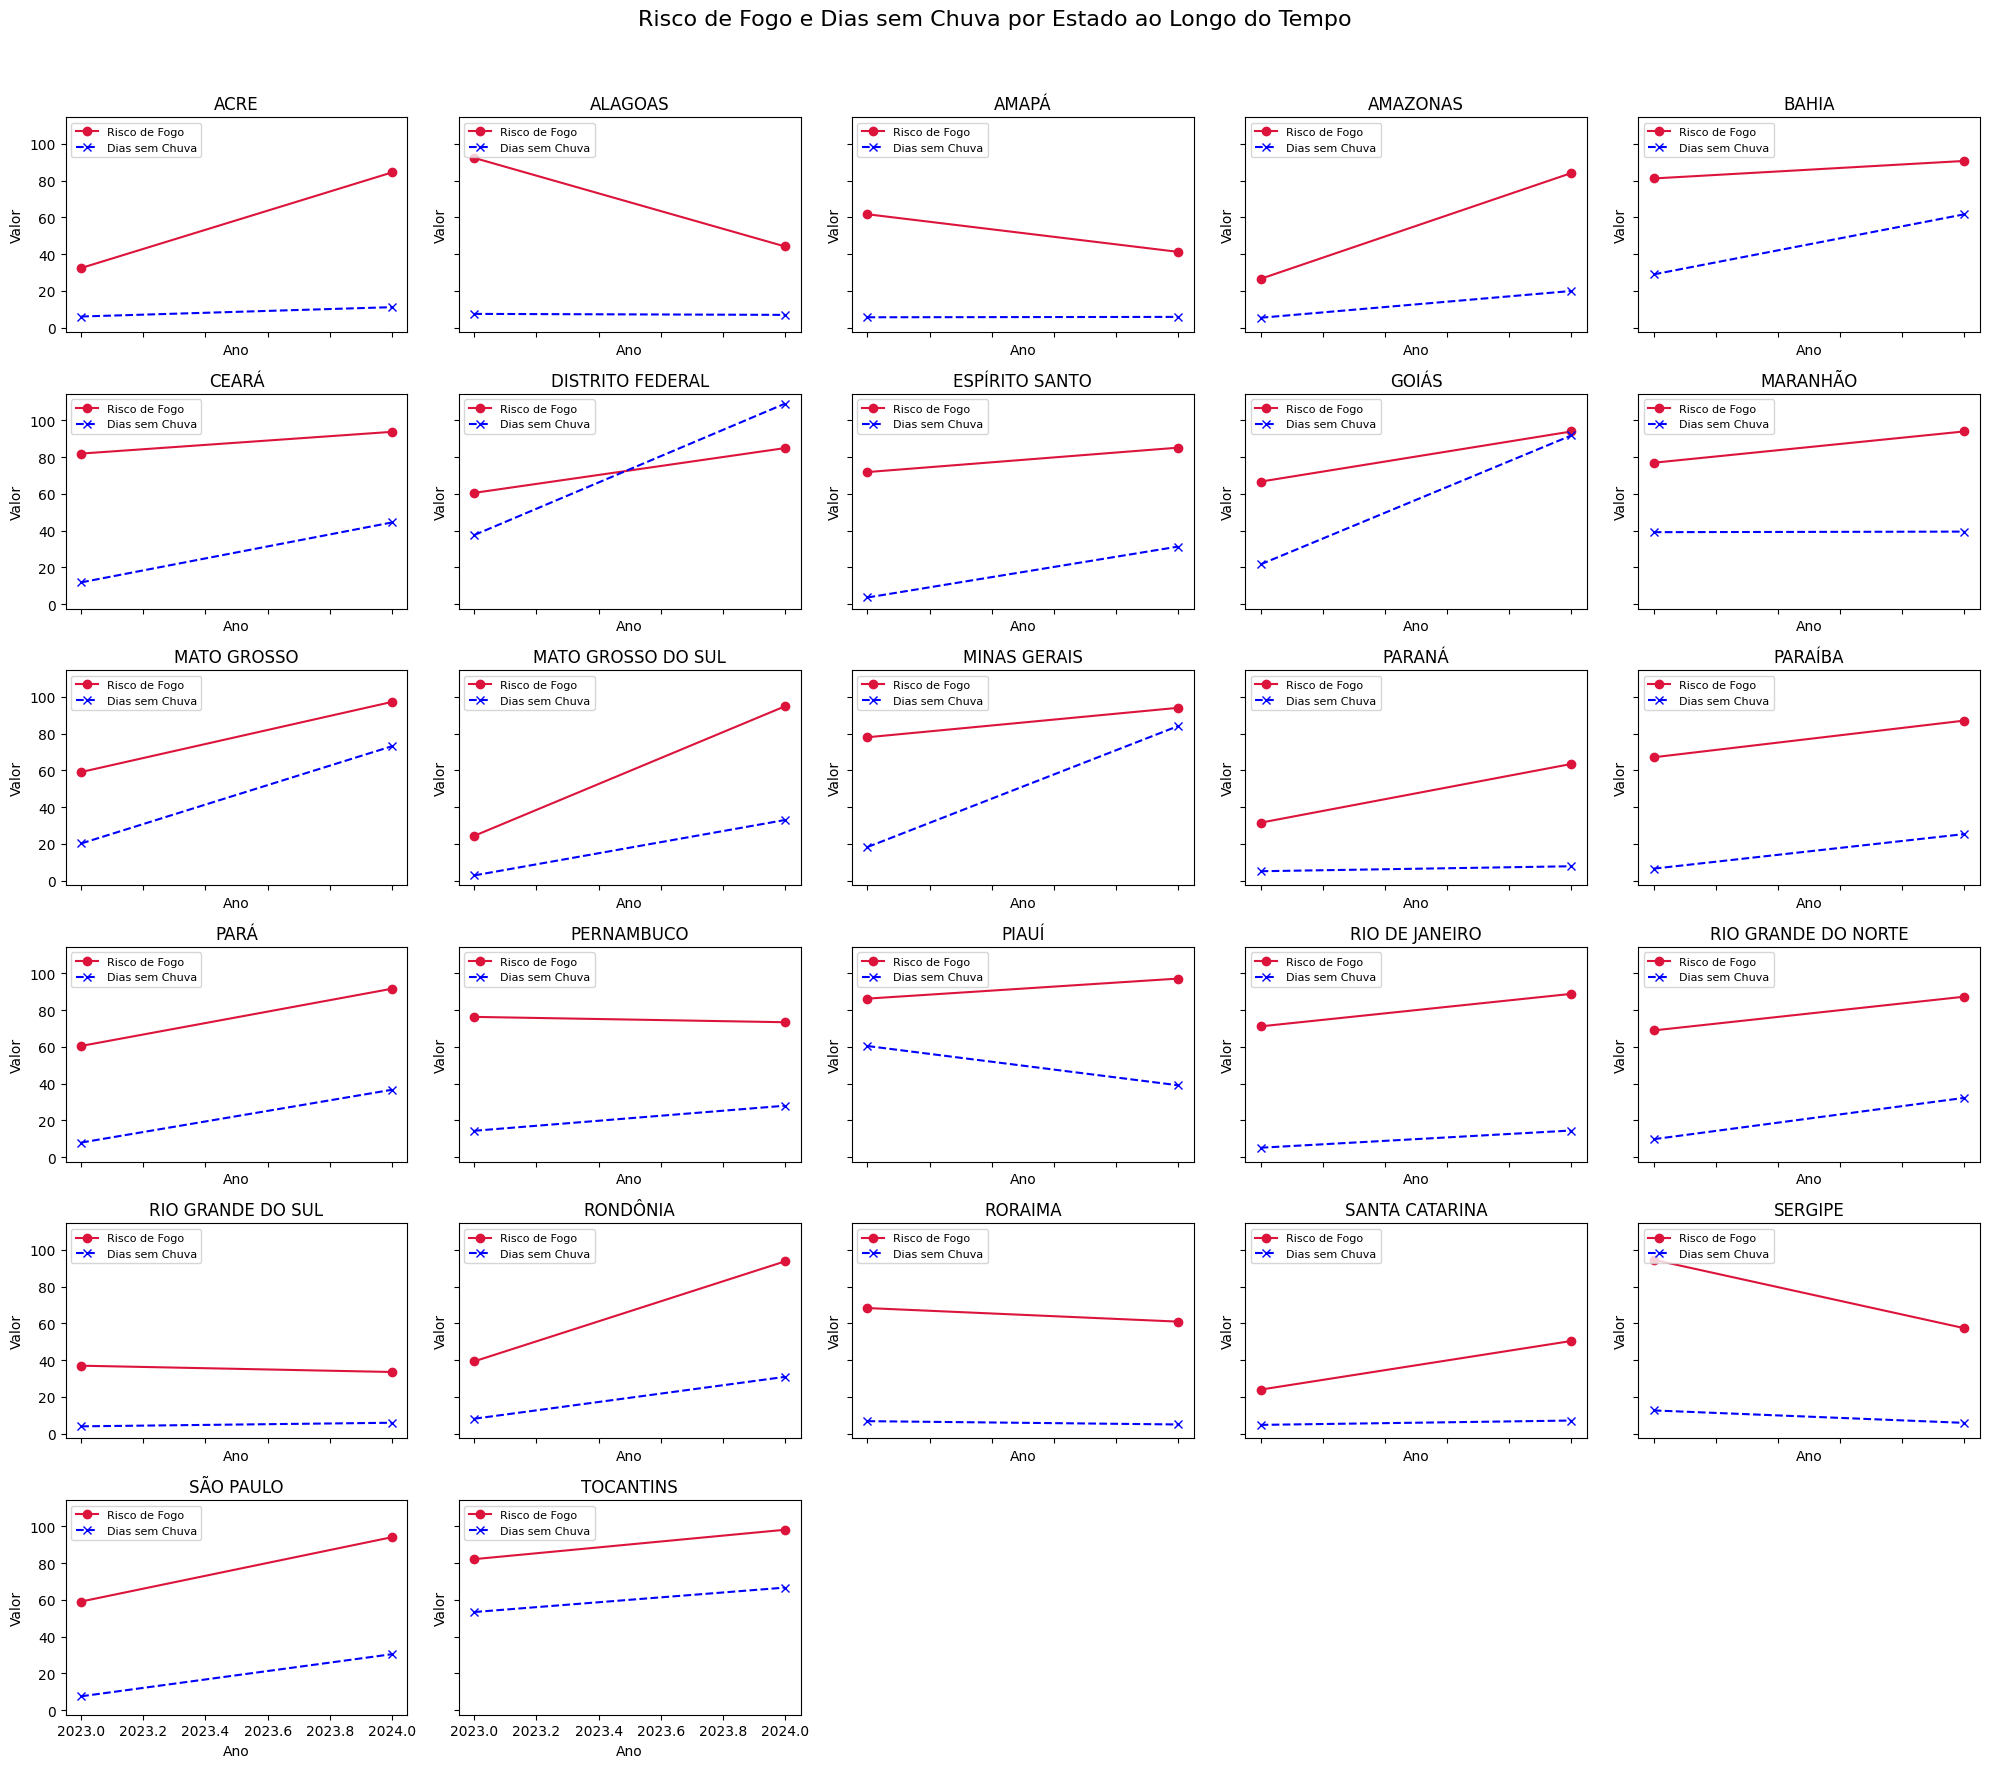

In [ ]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import re

especies = "/content/drive/MyDrive/Scripts/Data base/Species/StateSpec.csv"
caminho = "/content/drive/MyDrive/Scripts/Data base/Location Statistics/*.csv"

df = pd.read_csv(especies)
df['estado'] = df['estado'].str.upper()
resultado_especies = df.groupby('estado')['scientificName'].apply(list).reset_index()

arquivos = glob.glob(caminho)
df_list = []

for arquivo in arquivos:
    ano = re.search(r'\d{4}', arquivo)
    if ano:
        ano = int(ano.group(0))

        temp_df = pd.read_csv(arquivo)
        temp_df['ano'] = ano
        df_list.append(temp_df)

df_concatenado = pd.concat(df_list, ignore_index=True)

df_concatenado['risco_fogo'] = df_concatenado['risco_fogo'].clip(lower=0)
df_concatenado['numero_dias_sem_chuva'] = df_concatenado['numero_dias_sem_chuva'].clip(lower=0)

resultado_temporal = df_concatenado.groupby(['estado', 'ano']).agg({
    'risco_fogo': 'mean',
    'numero_dias_sem_chuva': 'mean'
}).reset_index()

resultado_temporal['risco_fogo'] = resultado_temporal['risco_fogo'] * 100

num_estados = resultado_temporal['estado'].nunique()
num_cols = 5
num_rows = (num_estados // num_cols) + (num_estados % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 3), sharex=True, sharey=True)
fig.suptitle('Risco de Fogo e Dias sem Chuva por Estado ao Longo do Tempo', fontsize=16)

for i, estado in enumerate(resultado_temporal['estado'].unique()):
    estado_data = resultado_temporal[resultado_temporal['estado'] == estado]
    ax = axes[i // num_cols, i % num_cols]

    ax.plot(estado_data['ano'], estado_data['risco_fogo'], marker='o', color='crimson', label='Risco de Fogo')

    ax.plot(estado_data['ano'], estado_data['numero_dias_sem_chuva'], marker='x', color='blue', linestyle='--', label='Dias sem Chuva')

    ax.set_title(estado)
    ax.legend(loc='upper left', fontsize=8)

for ax in axes.flat:
    ax.set_xlabel('Ano')
    ax.set_ylabel('Valor')

for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j // num_cols, j % num_cols])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


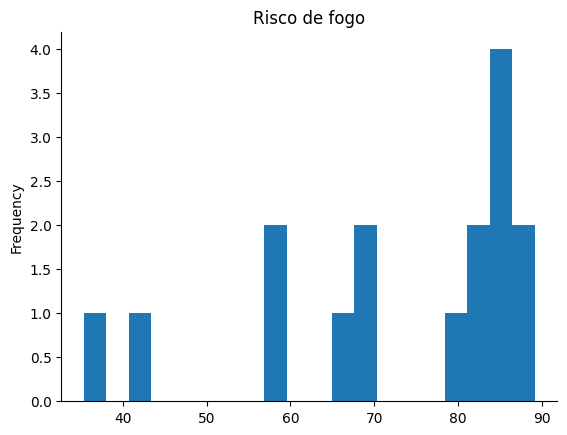

In [ ]:
from matplotlib import pyplot as plt
analise['Risco de fogo'].plot(kind='hist', bins=20, title='Risco de fogo')
plt.gca().spines[['top', 'right',]].set_visible(False)

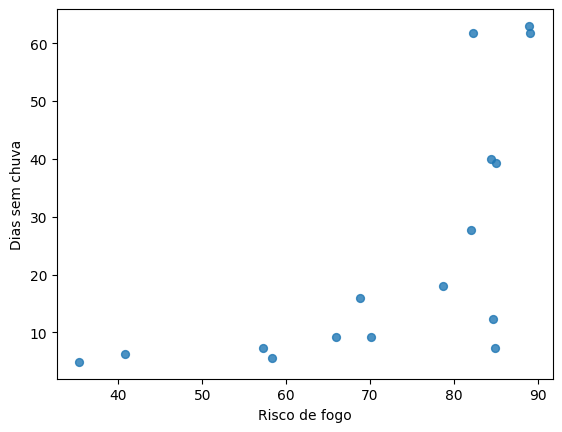

In [ ]:
from matplotlib import pyplot as plt
analise.plot(kind='scatter', x='Risco de fogo', y='Dias sem chuva', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(True)

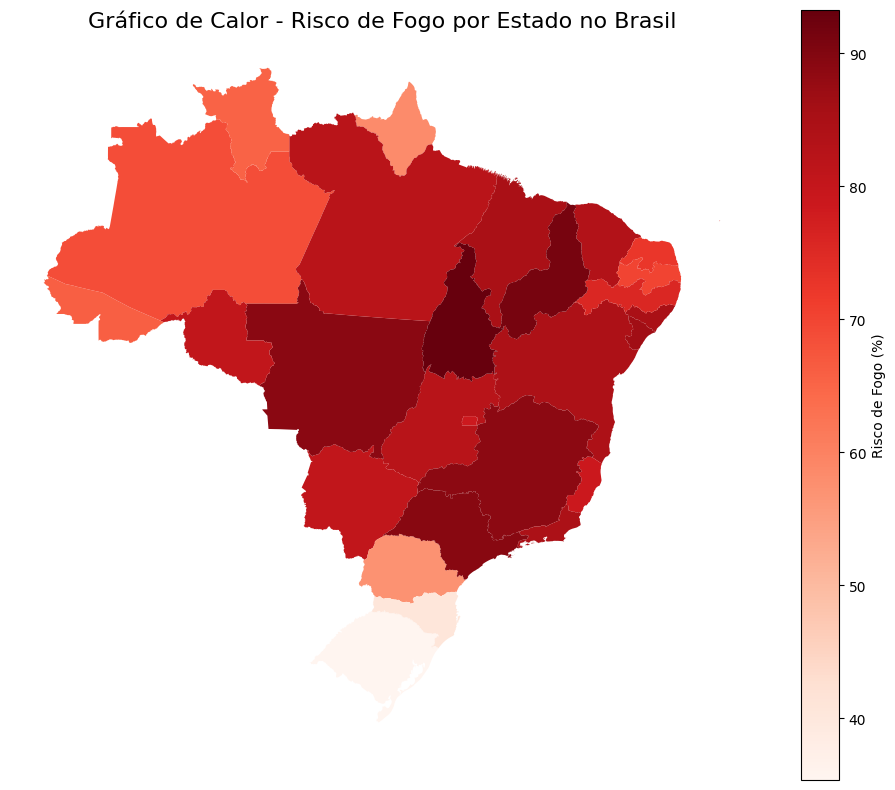

In [19]:
!pip install geopandas matplotlib pandas
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"
brasil = gpd.read_file(url)

analise['Estado'] = analise['Estado'].str.strip().str.upper()
brasil['name'] = brasil['name'].str.strip().str.upper()

brasil = brasil.merge(analise, left_on='name', right_on='Estado', how='left')

brasil['Risco de fogo'] = brasil['Risco de fogo'].fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
brasil.plot(column='Risco de fogo', ax=ax, legend=True,
            legend_kwds={'label': "Risco de Fogo (%)",
                         'orientation': "vertical"},
            cmap='Reds',
            missing_kwds={"color": "grey"})

ax.set_title('Gráfico de Calor - Risco de Fogo por Estado no Brasil', fontsize=16)
ax.set_axis_off()
plt.show()


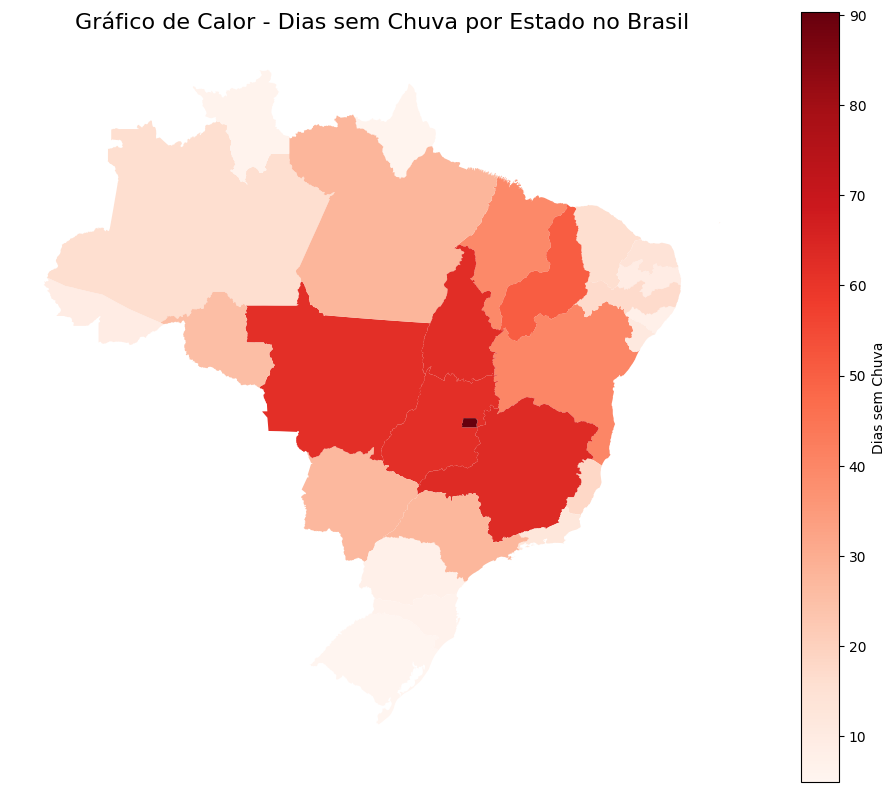

In [20]:
!pip install geopandas matplotlib pandas
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"
brasil = gpd.read_file(url)

analise['Estado'] = analise['Estado'].str.strip().str.upper()
brasil['name'] = brasil['name'].str.strip().str.upper()

brasil = brasil.merge(analise, left_on='name', right_on='Estado', how='left')
brasil['Dias sem chuva'] = brasil['Dias sem chuva'].fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
brasil.plot(column='Dias sem chuva', ax=ax, legend=True,
            legend_kwds={'label': "Dias sem Chuva",
                         'orientation': "vertical"},
            cmap='Reds',
            missing_kwds={"color": "grey"})

ax.set_title('Gráfico de Calor - Dias sem Chuva por Estado no Brasil', fontsize=16)
ax.set_axis_off()
plt.show()


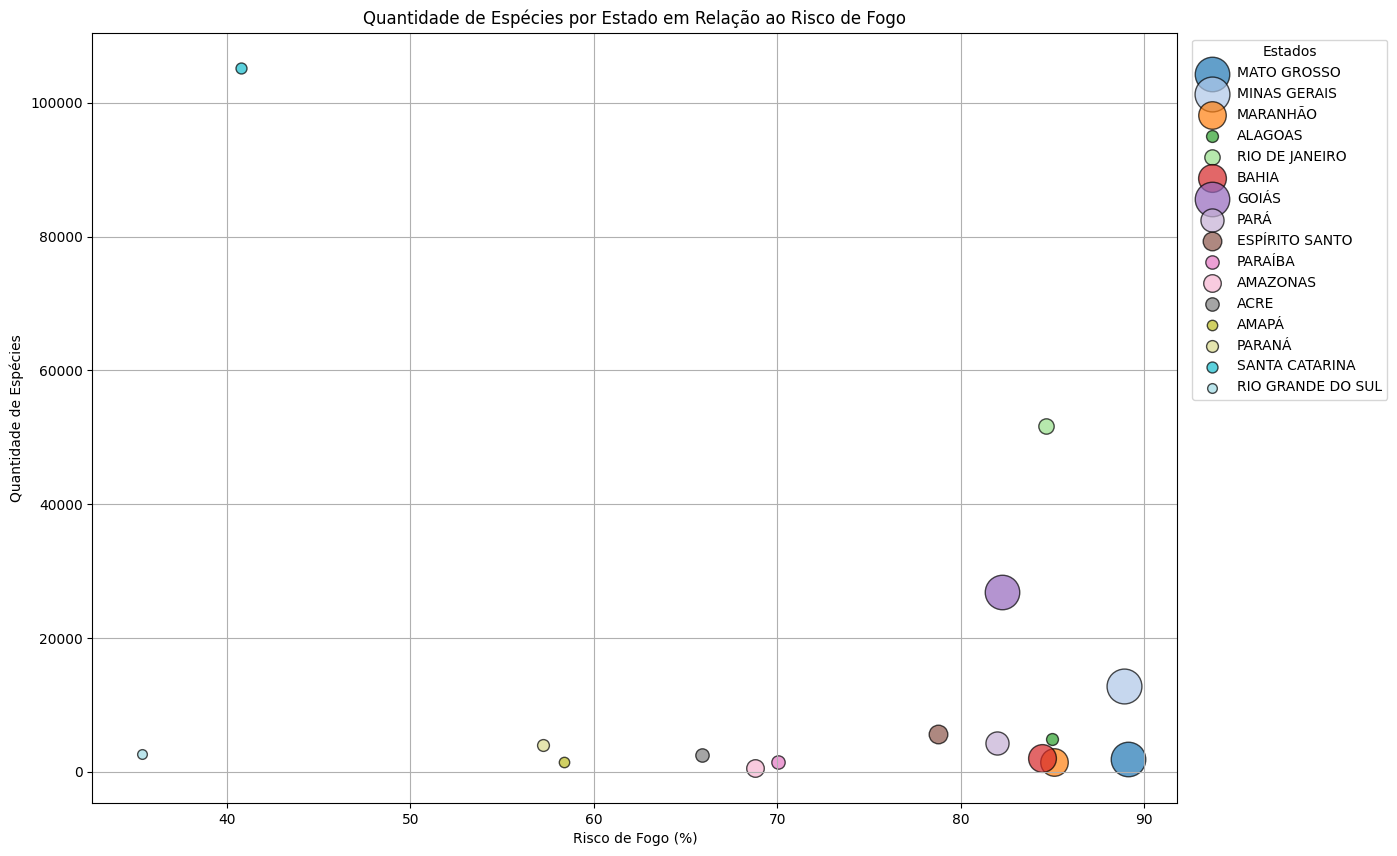

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

analise['Quantidade de espécies'] = analise['Nome das espécies'].apply(len)
analise = analise.dropna(subset=['Risco de fogo', 'Dias sem chuva', 'Quantidade de espécies'])

plt.figure(figsize=(14, 10))

colors = plt.cm.tab20(np.linspace(0, 1, len(analise['Estado'].unique())))

for i, estado in enumerate(analise['Estado'].unique()):
    estado_data = analise[analise['Estado'] == estado]
    plt.scatter(estado_data['Risco de fogo'], estado_data['Quantidade de espécies'],
                s=estado_data['Dias sem chuva'] * 10, color=colors[i], alpha=0.7, edgecolor='k', label=estado)

plt.xlabel('Risco de Fogo (%)')
plt.ylabel('Quantidade de Espécies')
plt.title('Quantidade de Espécies por Estado em Relação ao Risco de Fogo')

plt.legend(title="Estados", loc='upper right', bbox_to_anchor=(1.2, 1))

plt.grid(True)
plt.show()


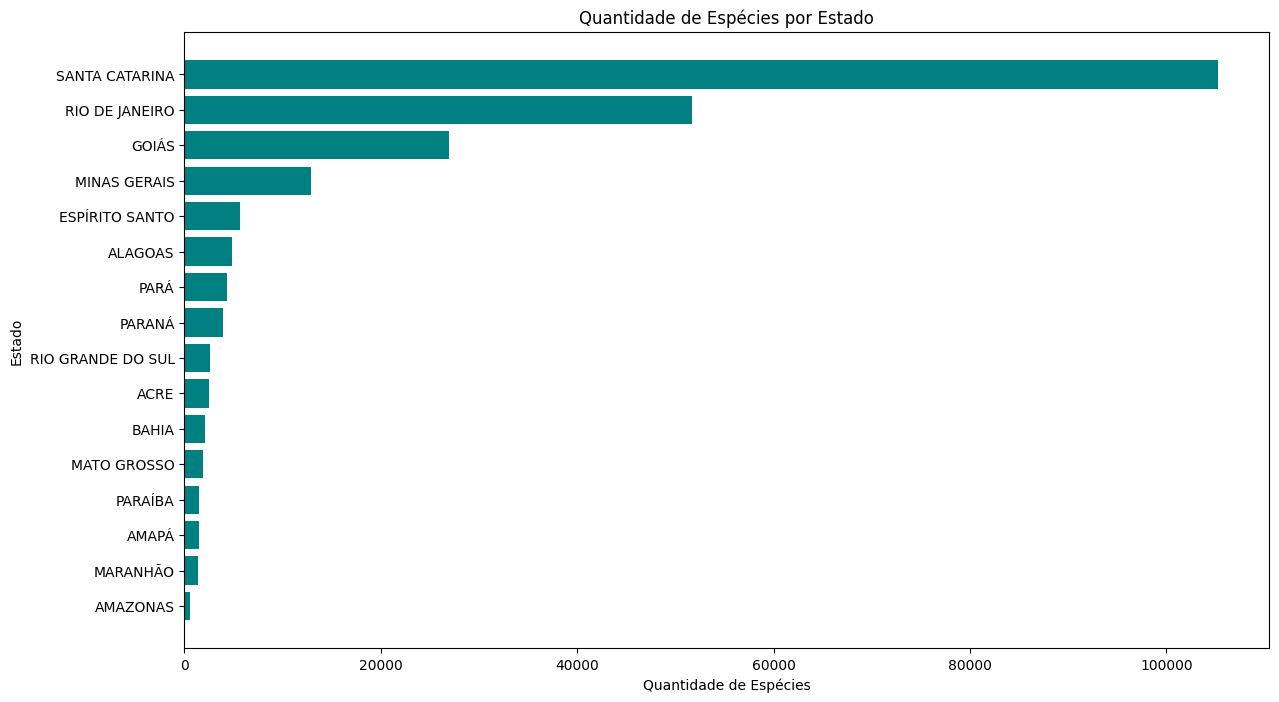

In [ ]:
import matplotlib.pyplot as plt

analise['Quantidade de espécies'] = analise['Nome das espécies'].apply(len)
analise = analise.dropna(subset=['Quantidade de espécies', 'Estado'])

analise_sorted = analise.sort_values(by='Quantidade de espécies', ascending=False)

plt.figure(figsize=(14, 8))
plt.barh(analise_sorted['Estado'], analise_sorted['Quantidade de espécies'], color='teal')
plt.xlabel('Quantidade de Espécies')
plt.ylabel('Estado')
plt.title('Quantidade de Espécies por Estado')
plt.gca().invert_yaxis()

plt.show()


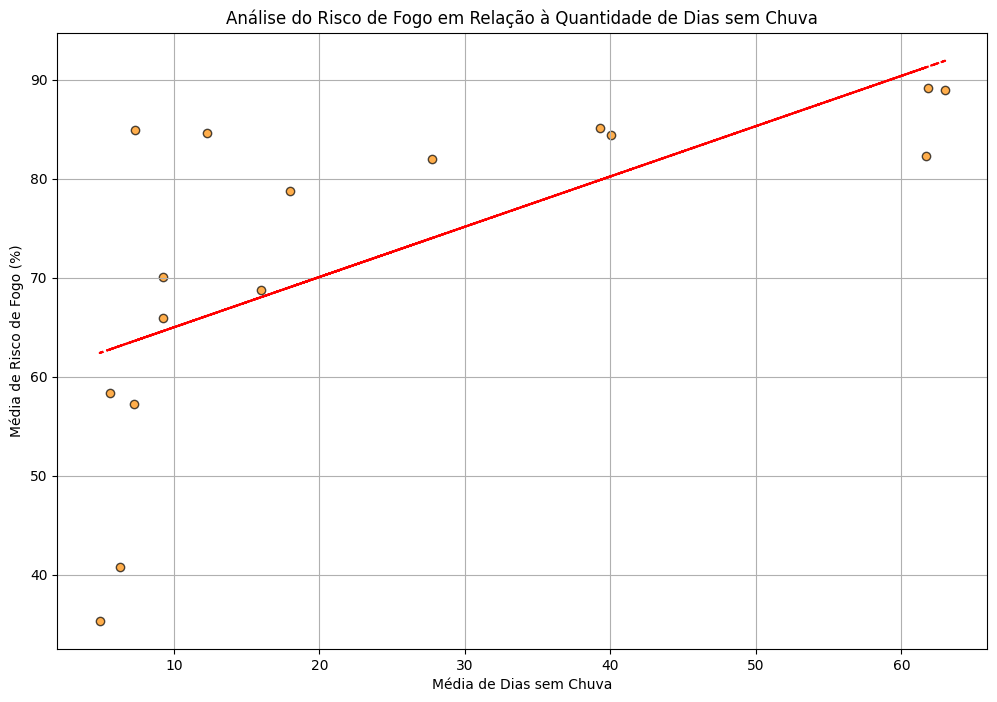

In [ ]:
import matplotlib.pyplot as plt

analise = analise.dropna(subset=['Risco de fogo', 'Dias sem chuva'])

media_risco_seca = analise.groupby('Estado').agg({
    'Risco de fogo': 'mean',
    'Dias sem chuva': 'mean'
}).reset_index()

plt.figure(figsize=(12, 8))
plt.scatter(media_risco_seca['Dias sem chuva'], media_risco_seca['Risco de fogo'],
            color='darkorange', alpha=0.7, edgecolor='k')

plt.xlabel('Média de Dias sem Chuva')
plt.ylabel('Média de Risco de Fogo (%)')
plt.title('Análise do Risco de Fogo em Relação à Quantidade de Dias sem Chuva')

z = np.polyfit(media_risco_seca['Dias sem chuva'], media_risco_seca['Risco de fogo'], 1)
p = np.poly1d(z)
plt.plot(media_risco_seca['Dias sem chuva'], p(media_risco_seca['Dias sem chuva']), "r--")

plt.grid(True)
plt.show()


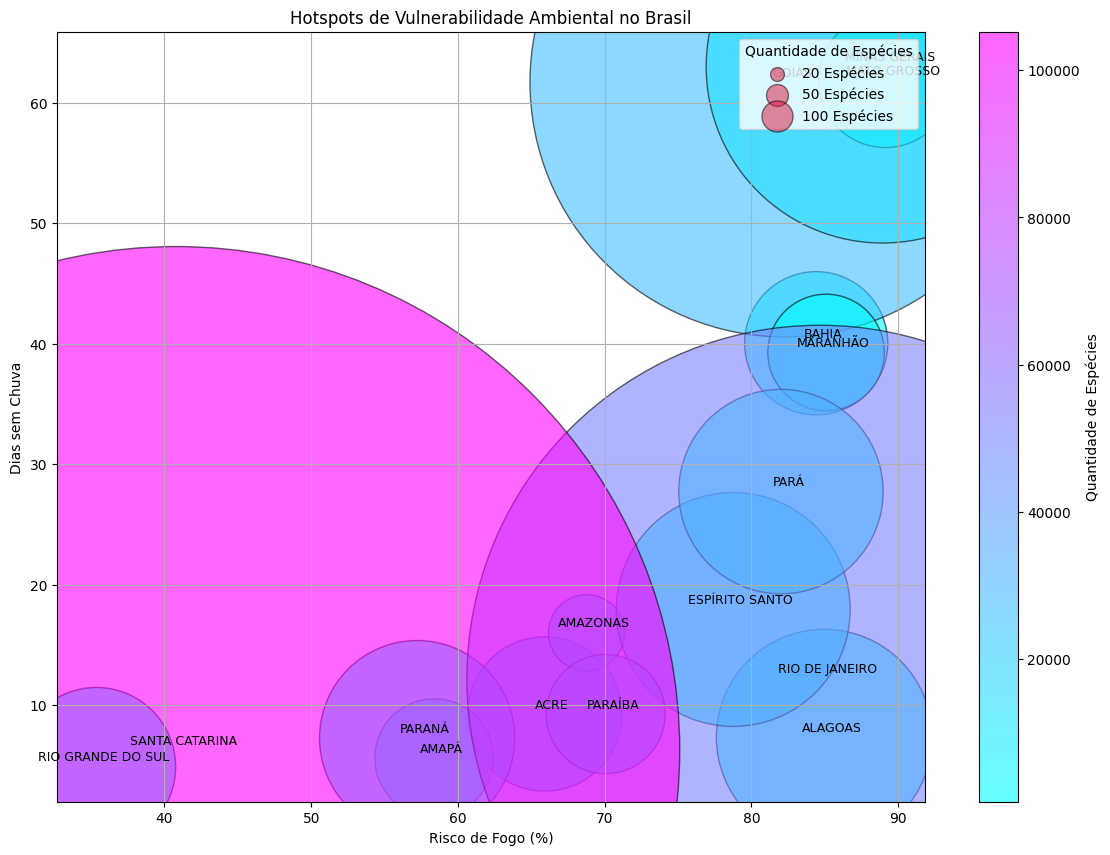

In [ ]:
import matplotlib.pyplot as plt

analise['Quantidade de espécies'] = analise['Nome das espécies'].apply(len)
analise = analise.dropna(subset=['Risco de fogo', 'Dias sem chuva', 'Quantidade de espécies'])

vulnerabilidade_estado = analise.groupby('Estado').agg({
    'Risco de fogo': 'mean',
    'Dias sem chuva': 'mean',
    'Quantidade de espécies': 'sum'
}).reset_index()

plt.figure(figsize=(14, 10))
scatter = plt.scatter(vulnerabilidade_estado['Risco de fogo'], vulnerabilidade_estado['Dias sem chuva'],
                      s=vulnerabilidade_estado['Quantidade de espécies'] * 5, alpha=0.6, cmap='cool', c=vulnerabilidade_estado['Quantidade de espécies'],
                      edgecolor='k')

for i, row in vulnerabilidade_estado.iterrows():
    plt.text(row['Risco de fogo'] + 0.5, row['Dias sem chuva'] + 0.5, row['Estado'], fontsize=9, ha='center')

plt.xlabel('Risco de Fogo (%)')
plt.ylabel('Dias sem Chuva')
plt.title('Hotspots de Vulnerabilidade Ambiental no Brasil')

cbar = plt.colorbar(scatter)
cbar.set_label('Quantidade de Espécies')

for size in [20, 50, 100]:
    plt.scatter([], [], s=size * 5, color='crimson', label=f'{size} Espécies', alpha=0.5, edgecolor='k')
plt.legend(title="Quantidade de Espécies", loc='upper right')

plt.grid(True)
plt.show()


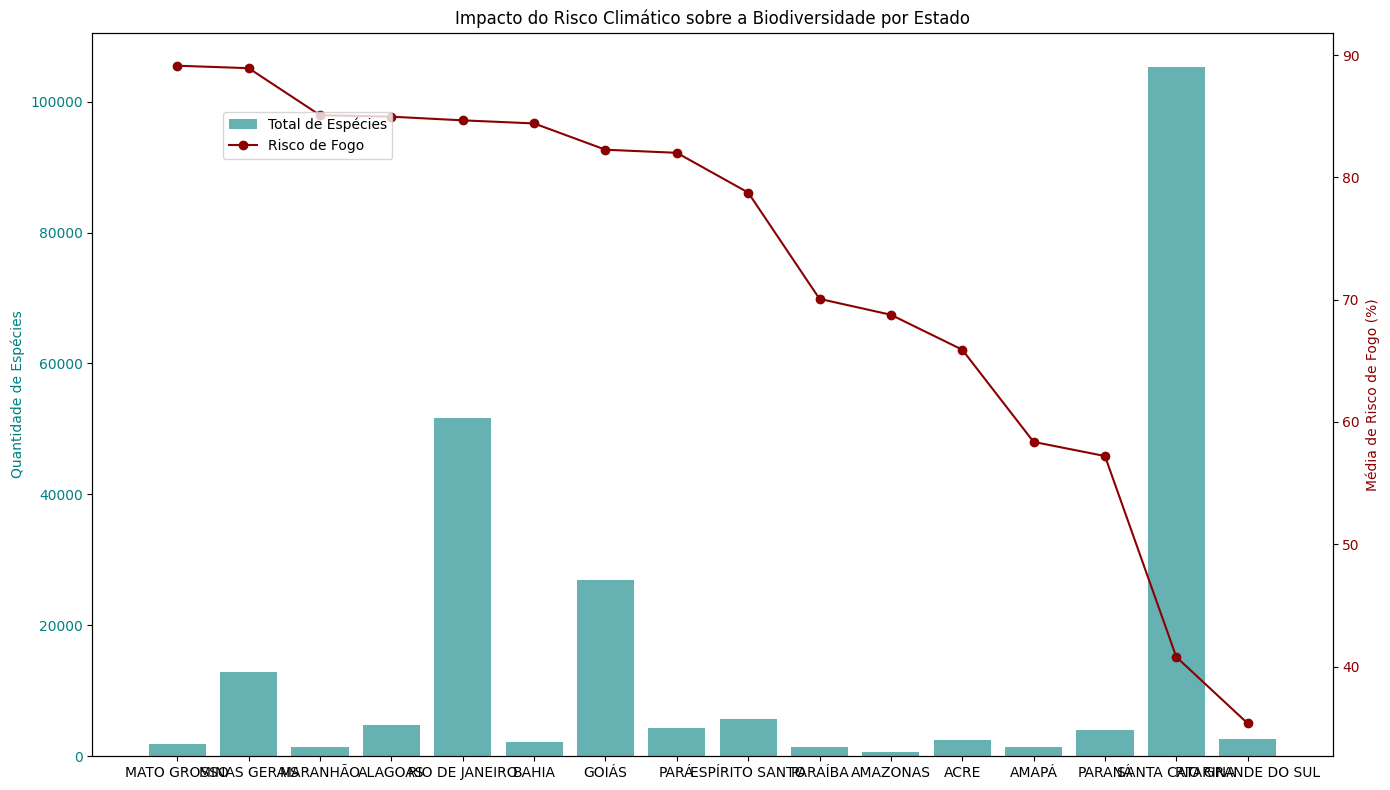

In [ ]:
import matplotlib.pyplot as plt

impacto_especies = analise.groupby('Estado').agg({
    'Risco de fogo': 'mean',
    'Quantidade de espécies': 'sum'
}).sort_values(by='Risco de fogo', ascending=False)

fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.bar(impacto_especies.index, impacto_especies['Quantidade de espécies'], color='teal', alpha=0.6, label='Total de Espécies')
ax1.set_ylabel('Quantidade de Espécies', color='teal')
ax1.tick_params(axis='y', labelcolor='teal')

ax2 = ax1.twinx()
ax2.plot(impacto_especies.index, impacto_especies['Risco de fogo'], color='darkred', marker='o', label='Risco de Fogo')
ax2.set_ylabel('Média de Risco de Fogo (%)', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

plt.title('Impacto do Risco Climático sobre a Biodiversidade por Estado')
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9), bbox_transform=ax1.transAxes)

plt.xticks(rotation=45, ha='right')
plt.show()


<ipython-input-46-6a67b60e9d59>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['estado'] = result['estado'].str.upper()


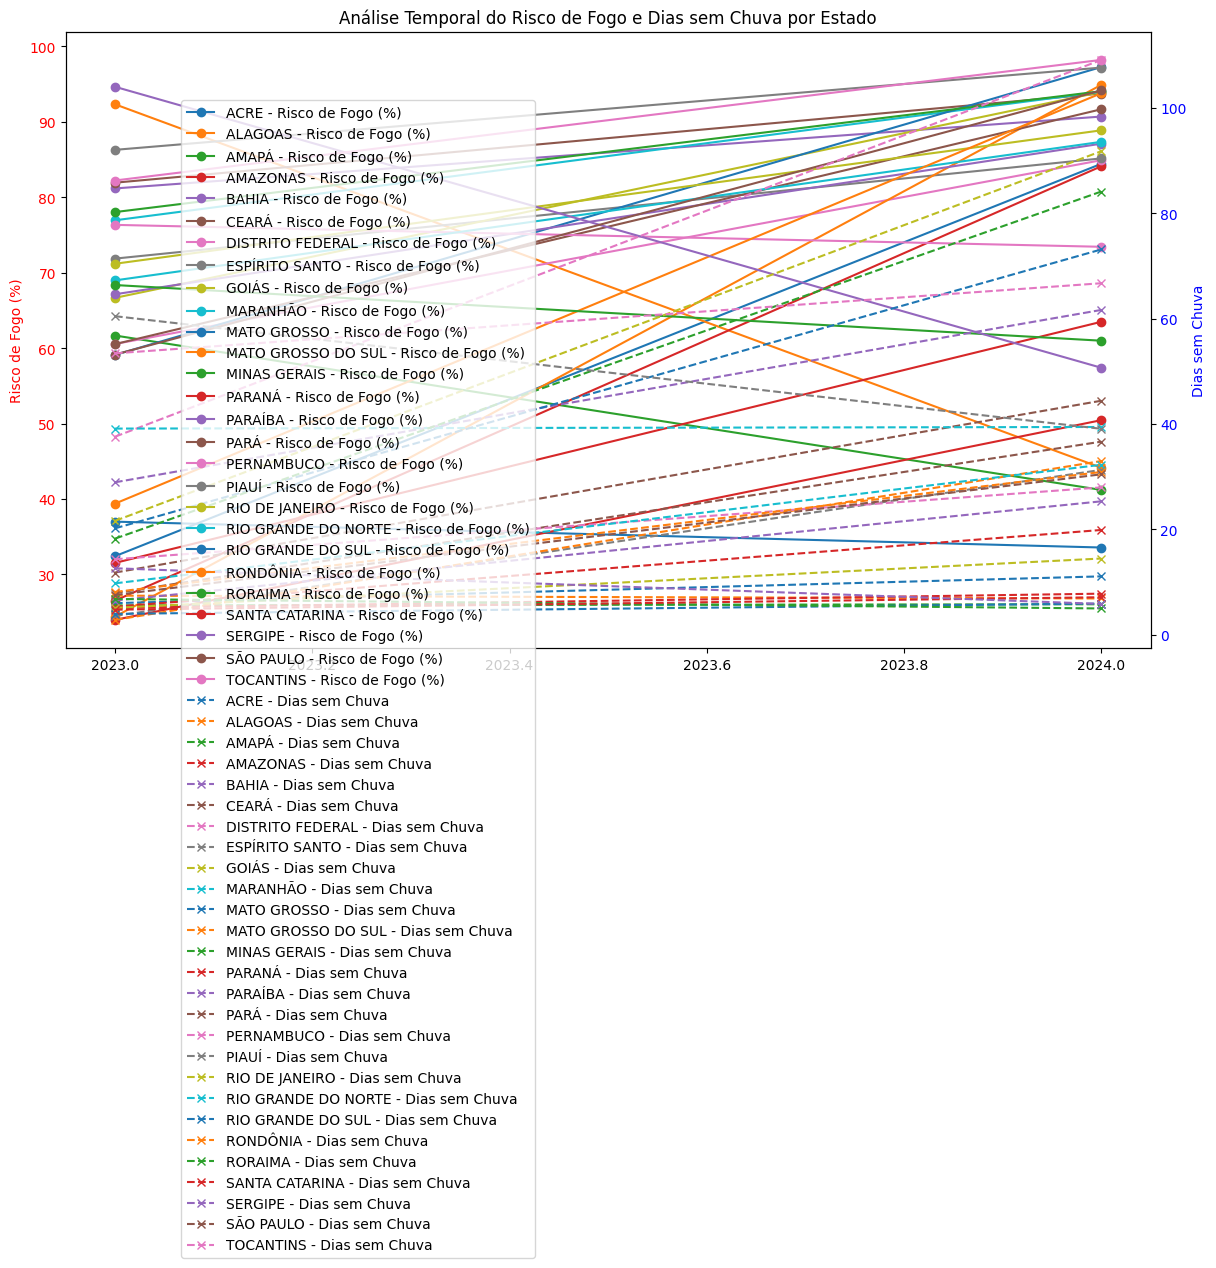

In [ ]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import re

especies = "/content/drive/MyDrive/Scripts/Data base/Species/StateSpec.csv"
caminho = "/content/drive/MyDrive/Scripts/Data base/Location Statistics/*.csv"

df = pd.read_csv(especies)
result = df.dropna()
result['estado'] = result['estado'].str.upper()
resultado_especies = result.groupby('estado')['scientificName'].apply(list).reset_index()

arquivos = glob.glob(caminho)
df_list = []

for arquivo in arquivos:
    ano = re.search(r'\d{4}', arquivo)
    if ano:
        ano = int(ano.group(0))

        temp_df = pd.read_csv(arquivo)
        temp_df['ano'] = ano
        df_list.append(temp_df)

df_concatenado = pd.concat(df_list, ignore_index=True)

df_concatenado['risco_fogo'] = df_concatenado['risco_fogo'].clip(lower=0)
df_concatenado['numero_dias_sem_chuva'] = df_concatenado['numero_dias_sem_chuva'].clip(lower=0)

resultado_temporal = df_concatenado.groupby(['estado', 'ano']).agg({
    'risco_fogo': 'mean',
    'numero_dias_sem_chuva': 'mean'
}).reset_index()

resultado_temporal['risco_fogo'] = resultado_temporal['risco_fogo'] * 100

fig, ax1 = plt.subplots(figsize=(14, 8))

for estado in resultado_temporal['estado'].unique():
    estado_data = resultado_temporal[resultado_temporal['estado'] == estado]
    ax1.plot(estado_data['ano'], estado_data['risco_fogo'], marker='o', label=f'{estado} - Risco de Fogo (%)')

ax1.set_ylabel('Risco de Fogo (%)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
for estado in resultado_temporal['estado'].unique():
    estado_data = resultado_temporal[resultado_temporal['estado'] == estado]
    ax2.plot(estado_data['ano'], estado_data['numero_dias_sem_chuva'], marker='x', linestyle='--', label=f'{estado} - Dias sem Chuva')

ax2.set_ylabel('Dias sem Chuva', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Análise Temporal do Risco de Fogo e Dias sem Chuva por Estado')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9), bbox_transform=ax1.transAxes)
plt.show()


<ipython-input-47-eda140d6c0a4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['estado'] = result['estado'].str.upper()


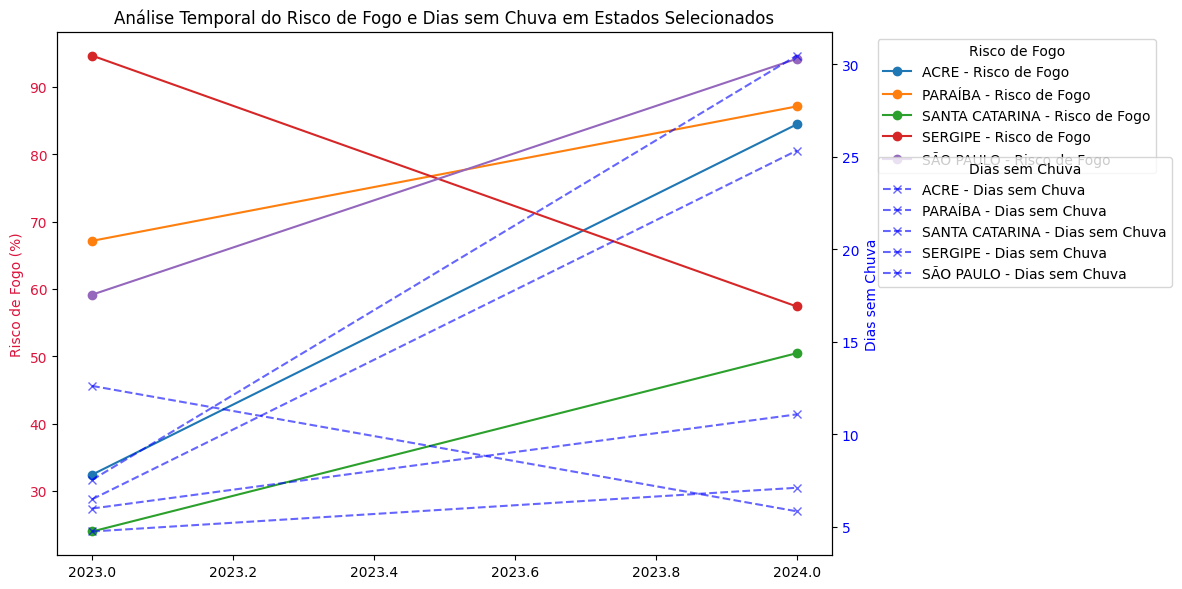

In [ ]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import re

especies = "/content/drive/MyDrive/Scripts/Data base/Species/StateSpec.csv"
caminho = "/content/drive/MyDrive/Scripts/Data base/Location Statistics/*.csv"

df = pd.read_csv(especies)
result = df.dropna()
result['estado'] = result['estado'].str.upper()
resultado_especies = result.groupby('estado')['scientificName'].apply(list).reset_index()

arquivos = glob.glob(caminho)
df_list = []

for arquivo in arquivos:
    ano = re.search(r'\d{4}', arquivo)
    if ano:
        ano = int(ano.group(0))

        temp_df = pd.read_csv(arquivo)
        temp_df['ano'] = ano
        df_list.append(temp_df)

df_concatenado = pd.concat(df_list, ignore_index=True)

df_concatenado['risco_fogo'] = df_concatenado['risco_fogo'].clip(lower=0)
df_concatenado['numero_dias_sem_chuva'] = df_concatenado['numero_dias_sem_chuva'].clip(lower=0)

resultado_temporal = df_concatenado.groupby(['estado', 'ano']).agg({
    'risco_fogo': 'mean',
    'numero_dias_sem_chuva': 'mean'
}).reset_index()

resultado_temporal['risco_fogo'] = resultado_temporal['risco_fogo'] * 100

estados_principais = resultado_temporal['estado'].value_counts().index[:5]
resultado_filtrado = resultado_temporal[resultado_temporal['estado'].isin(estados_principais)]

fig, ax1 = plt.subplots(figsize=(12, 6))

for estado in resultado_filtrado['estado'].unique():
    estado_data = resultado_filtrado[resultado_filtrado['estado'] == estado]
    ax1.plot(estado_data['ano'], estado_data['risco_fogo'], marker='o', label=f'{estado} - Risco de Fogo', linestyle='-')

ax1.set_ylabel('Risco de Fogo (%)', color='crimson')
ax1.tick_params(axis='y', labelcolor='crimson')

ax2 = ax1.twinx()
for estado in resultado_filtrado['estado'].unique():
    estado_data = resultado_filtrado[resultado_filtrado['estado'] == estado]
    ax2.plot(estado_data['ano'], estado_data['numero_dias_sem_chuva'], marker='x', linestyle='--', color='blue', alpha=0.6, label=f'{estado} - Dias sem Chuva')

ax2.set_ylabel('Dias sem Chuva', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Análise Temporal do Risco de Fogo e Dias sem Chuva em Estados Selecionados')
ax1.legend(loc="upper left", bbox_to_anchor=(1.05, 1), title="Risco de Fogo")
ax2.legend(loc="lower left", bbox_to_anchor=(1.05, 0.5), title="Dias sem Chuva")
fig.tight_layout()
plt.show()


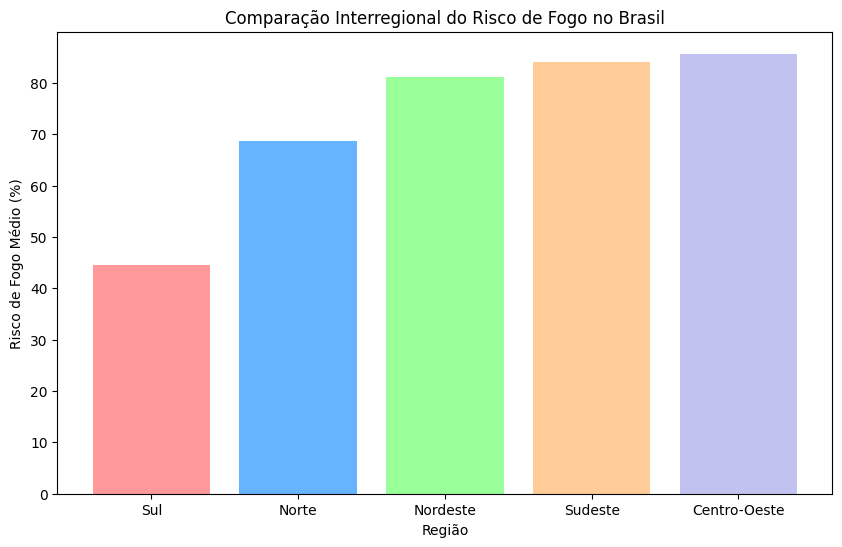

In [ ]:
import matplotlib.pyplot as plt

regioes = {
    'ACRE': 'Norte', 'AMAPÁ': 'Norte', 'AMAZONAS': 'Norte', 'PARÁ': 'Norte', 'RONDÔNIA': 'Norte',
    'RORAIMA': 'Norte', 'TOCANTINS': 'Norte', 'ALAGOAS': 'Nordeste', 'BAHIA': 'Nordeste',
    'CEARÁ': 'Nordeste', 'MARANHÃO': 'Nordeste', 'PARAÍBA': 'Nordeste', 'PERNAMBUCO': 'Nordeste',
    'PIAUÍ': 'Nordeste', 'RIO GRANDE DO NORTE': 'Nordeste', 'SERGIPE': 'Nordeste',
    'GOIÁS': 'Centro-Oeste', 'MATO GROSSO': 'Centro-Oeste', 'MATO GROSSO DO SUL': 'Centro-Oeste',
    'DISTRITO FEDERAL': 'Centro-Oeste', 'ESPÍRITO SANTO': 'Sudeste', 'MINAS GERAIS': 'Sudeste',
    'RIO DE JANEIRO': 'Sudeste', 'SÃO PAULO': 'Sudeste', 'PARANÁ': 'Sul', 'RIO GRANDE DO SUL': 'Sul',
    'SANTA CATARINA': 'Sul'
}

analise['Região'] = analise['Estado'].map(regioes)

risco_fogo_regiao = analise.groupby('Região')['Risco de fogo'].mean().sort_values()

plt.figure(figsize=(10, 6))
plt.bar(risco_fogo_regiao.index, risco_fogo_regiao, color=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.xlabel('Região')
plt.ylabel('Risco de Fogo Médio (%)')
plt.title('Comparação Interregional do Risco de Fogo no Brasil')
plt.show()
